In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns


In [2]:
response = requests.get(
    "https://www.sofascore.com/konyaspor-fenerbahce/clbsKlb#11897410",
    headers = {
       "user-agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.0 Safari/605.1.15"   
    }
        )

In [3]:
response.status_code

200

header argumentini koymayınca website block koyup verileri çekmeyi engelleyebilir. 
(response.status 403 sonucu verirse block anlamına geliyor)

In [4]:
soup = BeautifulSoup(response.text, "html.parser")

In [5]:
soup.select_one('g[cursor="pointer"]')

bir çıktı vermiyor çünkü SofaScore'a her şey JavaScript ile yüklenmiş ve "requests" kütüphanesi sadece html ve css'i yükleyebiliyor. "Curlconventer.com" kullanarak çevirmek gerekiyor.

In [6]:
headers = {
    'Accept': '*/*',
    'Sec-Fetch-Site': 'same-site',
    'Accept-Language': 'en-US,en;q=0.9',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'Sec-Fetch-Mode': 'cors',
    'Cache-Control': 'max-age=0',
    'Origin': 'https://www.sofascore.com',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.0 Safari/605.1.15',
    'Connection': 'keep-alive',
    'Referer': 'https://www.sofascore.com/',
    'Host': 'api.sofascore.com',
    'Sec-Fetch-Dest': 'empty',
    'Priority': 'u=3, i',
}

response = requests.get('https://api.sofascore.com/api/v1/event/11897410/shotmap', headers=headers)

In [7]:
response.status_code

200

In [8]:
shots = response.json()

In [10]:
a = shots["shotmap"]

In [11]:
b = pd.DataFrame.from_dict(a)

In [12]:
b.drop(["xgot"], axis=1, inplace=True)

In [20]:
b.head()

,player,isHome,shotType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,xg,id,time,addedTime,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,goalType,blockCoordinates
0,"{'name': 'Fred', 'slug': 'fred', 'shortName': ...",True,miss,free-kick,"{'x': 23.1, 'y': 53.7, 'z': 0}",left-foot,high,"{'x': 0, 'y': 55, 'z': 80.6}",0.096865,2430371,90,4.0,5638,"{'start': {'x': 53.7, 'y': 23.1}, 'end': {'x':...",1,662,shot,NaN,NaN
1,"{'name': 'Guilherme Haubert Sityá', 'slug': 'g...",False,goal,regular,"{'x': 20.7, 'y': 27.5, 'z': 0}",left-foot,low-right,"{'x': 0, 'y': 45.9, 'z': 7}",0.020947,2430363,90,NaN,5362,"{'start': {'x': 27.5, 'y': 20.7}, 'end': {'x':...",1,38,shot,regular,NaN
2,"{'name': 'Cengiz Ünder', 'firstName': '', 'las...",True,save,assisted,"{'x': 20, 'y': 70.3, 'z': 0}",left-foot,low-left,"{'x': 0, 'y': 52, 'z': 15.2}",0.039657,2430358,86,NaN,5159,"{'start': {'x': 70.3, 'y': 20}, 'block': {'x':...",5,241,shot,NaN,"{'x': 0.7, 'y': 52.3, 'z': 0}"
3,"{'name': 'Uğurcan Yazğılı', 'slug': 'ugurcan-y...",True,goal,regular,"{'x': 4.3, 'y': 51, 'z': 0}",left-foot,low-left,"{'x': 0, 'y': 53.9, 'z': 8.2}",NaN,2430349,83,NaN,4949,"{'start': {'x': 51, 'y': 4.3}, 'end': {'x': 46...",8,451,shot,own,NaN
4,"{'name': 'Ferdi Kadıoğlu', 'firstName': '', 'l...",True,save,corner,"{'x': 22.2, 'y': 41, 'z': 0}",left-foot,low-centre,"{'x': 0, 'y': 51.1, 'z': 1.9}",0.028048,2430337,77,NaN,4597,"{'start': {'x': 41, 'y': 22.2}, 'block': {'x':...",14,803,shot,NaN,"{'x': 1.4, 'y': 50, 'z': 0}"


In [22]:
b["situation"].unique()

array(['free-kick', 'regular', 'assisted', 'corner', 'set-piece',
       'throw-in-set-piece', 'penalty'], dtype=object)

In [30]:
b = b.replace({True:1, False:0})

In [32]:
b.head(3)

,player,isHome,shotType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,xg,id,time,addedTime,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,goalType,blockCoordinates
0,"{'name': 'Fred', 'slug': 'fred', 'shortName': ...",1,miss,free-kick,"{'x': 23.1, 'y': 53.7, 'z': 0}",left-foot,high,"{'x': 0, 'y': 55, 'z': 80.6}",0.096865,2430371,90,4.0,5638,"{'start': {'x': 53.7, 'y': 23.1}, 'end': {'x':...",1,662,shot,NaN,NaN
1,"{'name': 'Guilherme Haubert Sityá', 'slug': 'g...",0,goal,regular,"{'x': 20.7, 'y': 27.5, 'z': 0}",left-foot,low-right,"{'x': 0, 'y': 45.9, 'z': 7}",0.020947,2430363,90,NaN,5362,"{'start': {'x': 27.5, 'y': 20.7}, 'end': {'x':...",1,38,shot,regular,NaN
2,"{'name': 'Cengiz Ünder', 'firstName': '', 'las...",1,save,assisted,"{'x': 20, 'y': 70.3, 'z': 0}",left-foot,low-left,"{'x': 0, 'y': 52, 'z': 15.2}",0.039657,2430358,86,NaN,5159,"{'start': {'x': 70.3, 'y': 20}, 'block': {'x':...",5,241,shot,NaN,"{'x': 0.7, 'y': 52.3, 'z': 0}"


,player,isHome,shotType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,xg,id,time,addedTime,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,goalType,blockCoordinates
0,"{'name': 'Fred', 'slug': 'fred', 'shortName': ...",True,miss,free-kick,"{'x': 23.1, 'y': 53.7, 'z': 0}",left-foot,high,"{'x': 0, 'y': 55, 'z': 80.6}",0.096865,2430371,90,4.0,5638,"{'start': {'x': 53.7, 'y': 23.1}, 'end': {'x':...",1,662,shot,NaN,NaN
1,"{'name': 'Guilherme Haubert Sityá', 'slug': 'g...",False,goal,regular,"{'x': 20.7, 'y': 27.5, 'z': 0}",left-foot,low-right,"{'x': 0, 'y': 45.9, 'z': 7}",0.020947,2430363,90,NaN,5362,"{'start': {'x': 27.5, 'y': 20.7}, 'end': {'x':...",1,38,shot,regular,NaN
2,"{'name': 'Cengiz Ünder', 'firstName': '', 'las...",True,save,assisted,"{'x': 20, 'y': 70.3, 'z': 0}",left-foot,low-left,"{'x': 0, 'y': 52, 'z': 15.2}",0.039657,2430358,86,NaN,5159,"{'start': {'x': 70.3, 'y': 20}, 'block': {'x':...",5,241,shot,NaN,"{'x': 0.7, 'y': 52.3, 'z': 0}"
3,"{'name': 'Uğurcan Yazğılı', 'slug': 'ugurcan-y...",True,goal,regular,"{'x': 4.3, 'y': 51, 'z': 0}",left-foot,low-left,"{'x': 0, 'y': 53.9, 'z': 8.2}",NaN,2430349,83,NaN,4949,"{'start': {'x': 51, 'y': 4.3}, 'end': {'x': 46...",8,451,shot,own,NaN
4,"{'name': 'Ferdi Kadıoğlu', 'firstName': '', 'l...",True,save,corner,"{'x': 22.2, 'y': 41, 'z': 0}",left-foot,low-centre,"{'x': 0, 'y': 51.1, 'z': 1.9}",0.028048,2430337,77,NaN,4597,"{'start': {'x': 41, 'y': 22.2}, 'block': {'x':...",14,803,shot,NaN,"{'x': 1.4, 'y': 50, 'z': 0}"
5,"{'name': 'Oğulcan Ülgün', 'firstName': 'Ogulca...",False,block,set-piece,"{'x': 25.1, 'y': 28, 'z': 0}",right-foot,low-centre,"{'x': 0, 'y': 50, 'z': 19}",0.010527,2430329,72,NaN,4284,"{'start': {'x': 28, 'y': 25.1}, 'block': {'x':...",19,1116,shot,NaN,"{'x': 14.9, 'y': 35.4, 'z': 0}"
6,"{'name': 'Cengiz Ünder', 'firstName': '', 'las...",True,save,assisted,"{'x': 9.5, 'y': 64.2, 'z': 0}",left-foot,low-left,"{'x': 0, 'y': 51.9, 'z': 3.8}",0.061381,2430327,68,NaN,4061,"{'start': {'x': 64.2, 'y': 9.5}, 'block': {'x'...",23,1339,shot,NaN,"{'x': 1.5, 'y': 53.4, 'z': 0}"
7,"{'name': 'Michy Batshuayi', 'firstName': '', '...",True,miss,assisted,"{'x': 10.9, 'y': 61.3, 'z': 0}",right-foot,close-right,"{'x': 0, 'y': 42.9, 'z': 25}",0.412366,2430323,66,NaN,3930,"{'start': {'x': 61.3, 'y': 10.9}, 'end': {'x':...",25,1470,shot,NaN,NaN
8,"{'name': 'Michy Batshuayi', 'firstName': '', '...",True,goal,assisted,"{'x': 2.6, 'y': 42.5, 'z': 0}",right-foot,high-left,"{'x': 0, 'y': 54.1, 'z': 21.5}",0.857812,2430321,63,NaN,3777,"{'start': {'x': 42.5, 'y': 2.6}, 'end': {'x': ...",28,1623,shot,regular,NaN
9,"{'name': 'İrfan Can Kahveci', 'slug': 'irfan-c...",True,miss,free-kick,"{'x': 24.8, 'y': 38.7, 'z': 0}",left-foot,high,"{'x': 0, 'y': 53.4, 'z': 68.1}",0.057301,2430308,56,NaN,3300,"{'start': {'x': 38.7, 'y': 24.8}, 'end': {'x':...",35,2100,shot,NaN,NaN


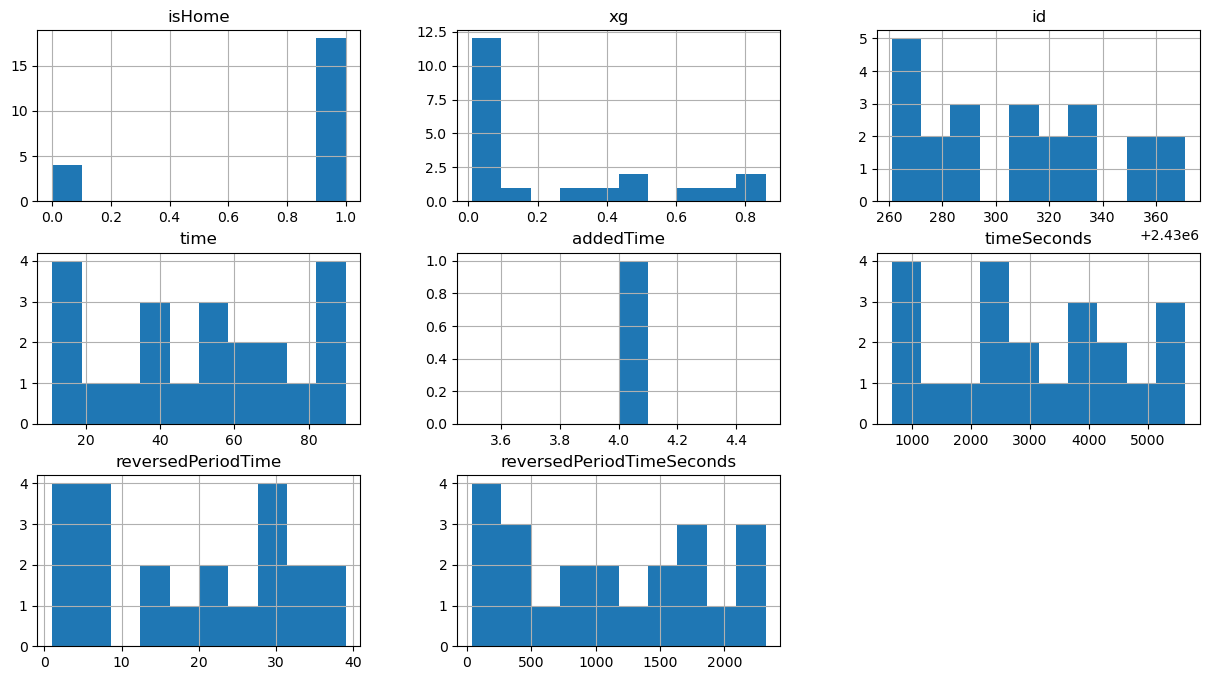

In [36]:
b.hist(figsize=(15,8));